<a href="https://colab.research.google.com/github/RafaelEstatistico/SAS_TOOLBOX/blob/master/%5BCIFAR%5D_Explorando_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Network (CNN)

### Import TensorFlow

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

### Download and prepare the CIFAR10 dataset


The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170500096/170498071 [==============================] - 3s 0us/step


### Verify the data

To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image.


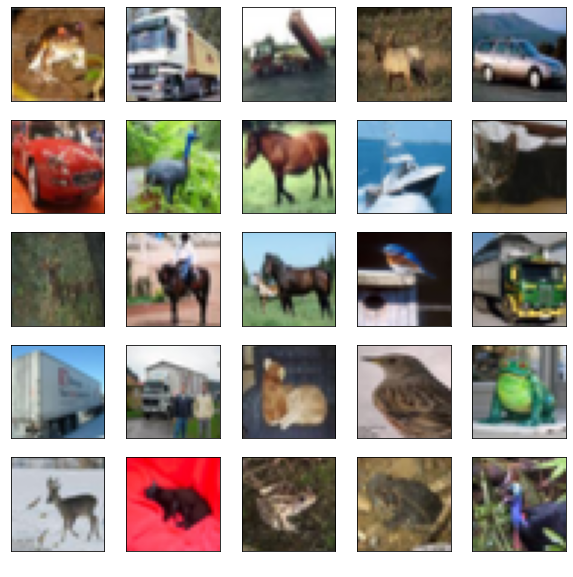

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]], color='white', fontsize=15)
plt.show()

In [ ]:
# Verificando frequencias de cada categoria
import numpy as np
np.unique(train_labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))

### Create the convolutional base

The 6 lines of code below define the convolutional base using a common pattern: a stack of [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) and [MaxPooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) layers.

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. If you are new to these dimensions, color_channels refers to (R,G,B). In this example, you will configure our CNN to process inputs of shape (32, 32, 3), which is the format of CIFAR images. You can do this by passing the argument `input_shape` to our first layer.


In [ ]:
train_images.shape 
# 5k imagens 32x32 com RGB (3 escalas de cores)

(50000, 32, 32, 3)

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding="SAME", input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="SAME"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="SAME"))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10) )
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)               


Let's display the architecture of our model so far.

In [ ]:
img_channels = 3
img_rows = 54
img_cols = 54

# Layer 0: Input
x = Input((img_rows, img_cols, img_channels))

# Layer 1: 48-unit maxout convolution
y = Convolution2D(nb_filter = 48, nb_row = 5, nb_col = 5, border_mode="same", name="1conv")(x)
y = MaxPooling2D(pool_size = (2, 2), strides = (2, 2), border_mode="same", name="1maxpool")(y)
# y = SubtractiveNormalization((3,3))(y)
# y = Dropout(0.25, name="1drop")(y)
# y = MaxoutDense(output_dim = 48, nb_feature=3)(y)
y = Activation('relu', name="1activ")(y)

# Layer 2: 64-unit relu convolution
y = Convolution2D(nb_filter = 64, nb_row = 5, nb_col = 5, border_mode="same", name="2conv")(y)
y = MaxPooling2D(pool_size = (2, 2), strides = (1, 1), border_mode="same", name="2maxpool")(y)
# y = SubtractiveNormalization((3,3))(y)
y = Dropout(0.25, name="2drop")(y)
y = Activation('relu', name="2activ")(y)

# Layer 3: 128-unit relu convolution
y = Convolution2D(nb_filter = 128, nb_row = 5, nb_col = 5, border_mode="same", name="3conv")(y)
y = MaxPooling2D(pool_size = (2, 2), strides = (2, 2), border_mode="same", name="3maxpool")(y)
# y = SubtractiveNormalization((3,3))(y)
y = Dropout(0.25, name="3drop")(y)
y = Activation('relu', name="3activ")(y)

# Layer 4: 160-unit relu convolution
y = Convolution2D(nb_filter = 160, nb_row = 5, nb_col = 5, border_mode="same", name="4conv")(y)
y = MaxPooling2D(pool_size = (2, 2), strides = (1, 1), border_mode="same", name="4maxpool")(y)
# y = SubtractiveNormalization((3,3))(y)
y = Dropout(0.25, name="4drop")(y)
y = Activation('relu', name="4activ")(y)

# Layer 5: 192-unit relu convolution
y = Convolution2D(nb_filter = 192, nb_row = 5, nb_col = 5, border_mode="same", name="5conv")(y)
y = MaxPooling2D(pool_size = (2, 2), strides = (2, 2), border_mode="same", name="5maxpool")(y)
# y = SubtractiveNormalization((3,3))(y)
y = Dropout(0.25, name="5drop")(y)
y = Activation('relu', name="5activ")(y)

# Layer 6: 192-unit relu convolution
y = Convolution2D(nb_filter = 192, nb_row = 5, nb_col = 5, border_mode="same", name="6conv")(y)
y = MaxPooling2D(pool_size = (2, 2), strides = (1, 1), border_mode="same", name="6maxpool")(y)
# y = SubtractiveNormalization((3,3))(y)
y = Dropout(0.25, name="6drop")(y)
y = Activation('relu', name="6activ")(y)

# Layer 7: 192-unit relu convolution
y = Convolution2D(nb_filter = 192, nb_row = 5, nb_col = 5, border_mode="same", name="7conv")(y)
y = MaxPooling2D(pool_size = (2, 2), strides = (2, 2), border_mode="same", name="7maxpool")(y)
# y = SubtractiveNormalization((3,3))(y)
y = Dropout(0.25, name="7drop")(y)
y = Activation('relu', name="7activ")(y)

# Layer 8: 192-unit relu convolution
y = Convolution2D(nb_filter = 192, nb_row = 5, nb_col = 5, border_mode="same", name="8conv")(y)
y = MaxPooling2D(pool_size = (2, 2), strides = (1, 1), border_mode="same", name="8maxpool")(y)
# y = SubtractiveNormalization((3,3))(y)
y = Dropout(0.25, name="8drop")(y)
y = Activation('relu', name="8activ")(y)

# Layer 9: Flatten
y = Flatten()(y)

# Layer 10: Fully-Connected Layer
y = Dense(3072, activation=None, name="fc1")(y)

# Layer 11: Fully-Connected Layer
y = Dense(3072, activation=None, name="fc2")(y)

length = Dense(7, activation="softmax", name="length")(y)
digit1 = Dense(11, activation="softmax", name="digit1")(y)
digit2 = Dense(11, activation="softmax", name="digit2")(y)
digit3 = Dense(11, activation="softmax", name="digit3")(y)
digit4 = Dense(11, activation="softmax", name="digit4")(y)
digit5 = Dense(11, activation="softmax", name="digit5")(y)

model = Model(input=x, output=[length, digit1, digit2, digit3, digit4, digit5])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

y_val = [y0_test, y1_test, y2_test, y3_test, y4_test, y5_test]

model.fit(X_train,
          [y0_train, y1_train, y2_train, y3_train, y4_train, y5_train],
          validation_data=(X_test,
                           y_val),
          nb_epoch=10,
          batch_size=200,
          verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(name="1conv", kernel_size=(5, 5), filters=48, padding="same")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name="1maxpool", padding="same")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(name="2conv", kernel_size=(5, 5), filters=64, padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), strides=(1, 1), name="2maxpool", padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call 

NameError: ignored

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 54, 54, 3)    0                                            
__________________________________________________________________________________________________
1conv (Conv2D)                  (None, 54, 54, 48)   3648        input_2[0][0]                    
__________________________________________________________________________________________________
1maxpool (MaxPooling2D)         (None, 27, 27, 48)   0           1conv[0][0]                      
__________________________________________________________________________________________________
1activ (Activation)             (None, 27, 27, 48)   0           1maxpool[0][0]                   
____________________________________________________________________________________________

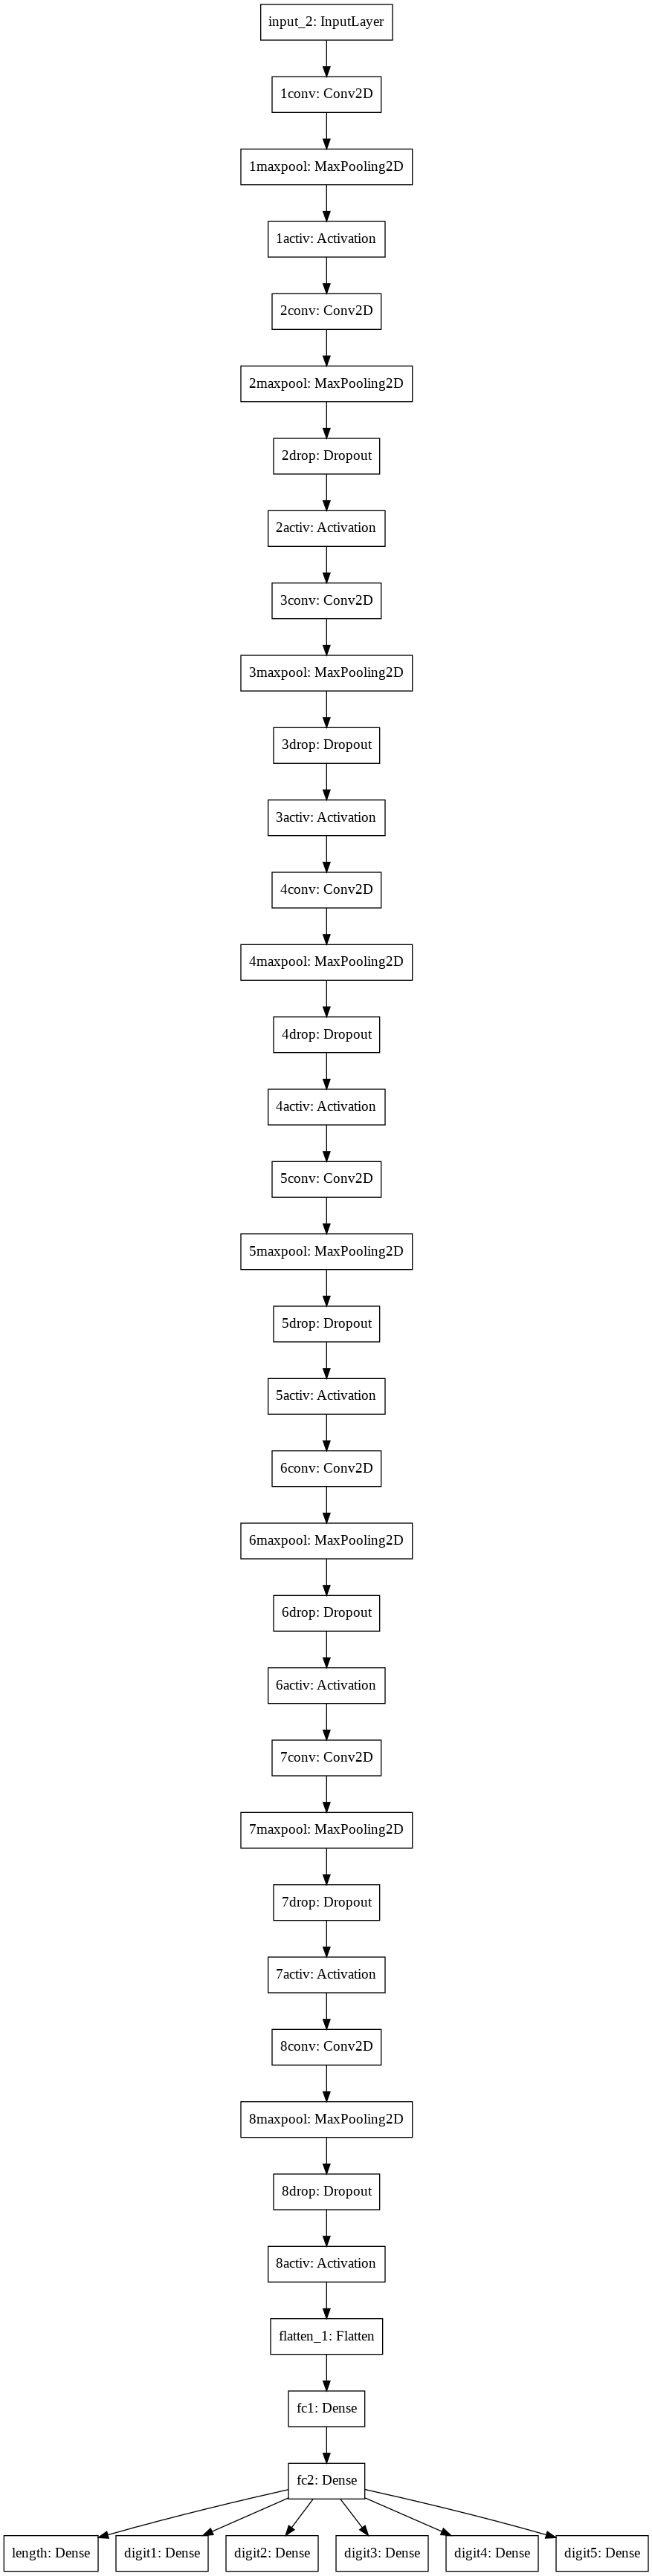

In [ ]:
keras.utils.plot_model(model, "my_first_model.png")

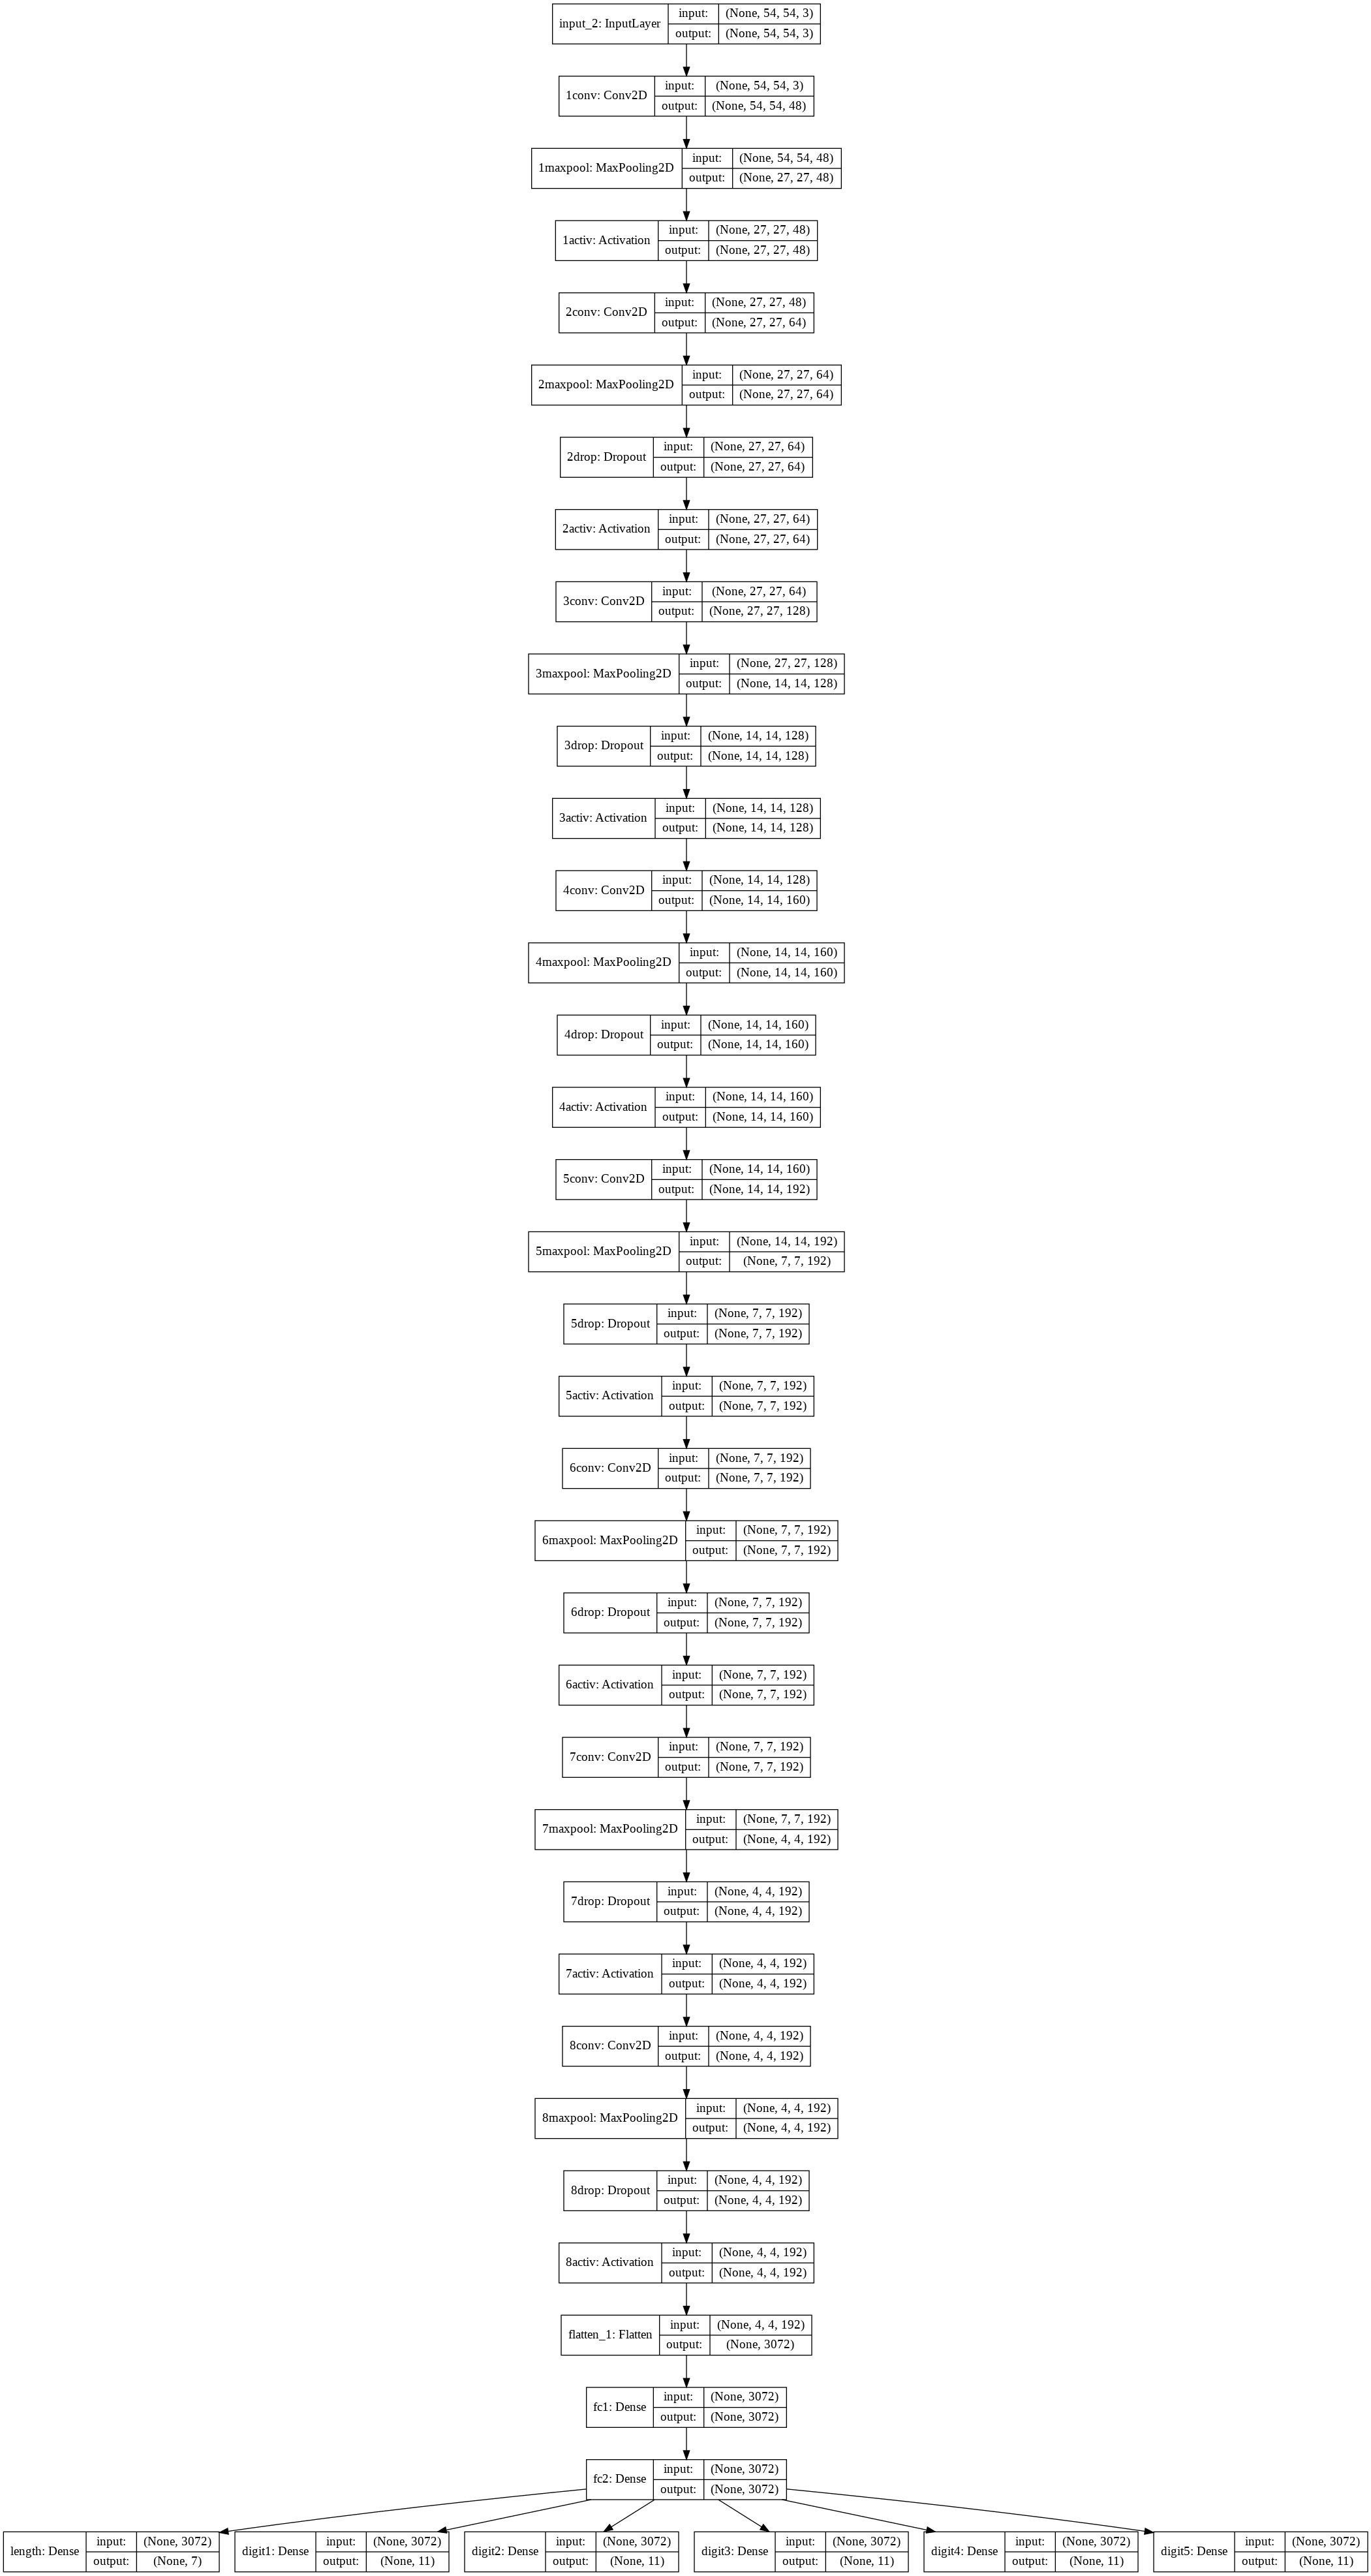

In [ ]:
keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)

In [ ]:
import keras
from keras.models import Sequential, Model#the model
from keras.layers import Dense, Dropout, Activation, Flatten, Input #fully connected layers
from keras.layers import Convolution2D, MaxPooling2D #the convnet
from keras.utils import np_utils #extra tools

# model_input = Input(shape=(img_rows, img_cols, img_channels))
model_input=(28, 140, 3)

x = Convolution2D(32, 3, 3, activation='relu', border_mode='same', input_shape=(model_input))
x = Activation('relu')(x)
x = Convolution2D(32, 3, 3)(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
# x = Dropout(0.25)(x)
conv_out = Flatten()(x)

x = Dense(1024, activation="relu")(x)

x1 = Dense(nb_classes, activation='softmax')(x)
x2 = Dense(nb_classes, activation='softmax')(x)
x3 = Dense(nb_classes, activation='softmax')(x)
x4 = Dense(nb_classes, activation='softmax')(x)
x5 = Dense(nb_classes, activation='softmax')(x)

lst = [x1, x2, x3, x4, x5]

model = Model(input=model_input, output=lst)
model.summary()

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 140, ..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.


ValueError: ignored

In [ ]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd)
model.fit(X_train, y_train_dummy, batch_size=batch_size, nb_epoch=nb_epoch, verbose=1, validation_data=(X_val, y_val_dummy))

model.add(layers.Conv2D(32, (3, 3), activation='relu', padding="SAME", input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="SAME"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="SAME"))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10) )
model.summary()


Here's the complete architecture of our model.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                2

As you can see, our (4, 4, 64) outputs were flattened into vectors of shape (1024) before going through two Dense layers.

### Compile and train the model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 103s 66ms/step - loss: 1.4282 - accuracy: 0.4832 - val_loss: 1.1416 - val_accuracy: 0.5958
Epoch 2/10
1563/1563 [==============================] - 102s 65ms/step - loss: 1.0107 - accuracy: 0.6445 - val_loss: 0.9233 - val_accuracy: 0.6755
Epoch 3/10
1563/1563 [==============================] - 102s 65ms/step - loss: 0.8490 - accuracy: 0.7032 - val_loss: 0.9324 - val_accuracy: 0.6748
Epoch 4/10
1563/1563 [==============================] - 102s 65ms/step - loss: 0.7445 - accuracy: 0.7414 - val_loss: 0.8319 - val_accuracy: 0.7127
Epoch 5/10
1563/1563 [==============================] - 101s 65ms/step - loss: 0.6596 - accuracy: 0.7686 - val_loss: 0.8205 - val_accuracy: 0.7169
Epoch 6/10
1563/1563 [==============================] - 102s 65ms/step - loss: 0.5843 - accuracy: 0.7957 - val_loss: 0.8488 - val_accuracy: 0.7194
Epoch 7/10
1563/1563 [==============================] - 102s 65ms/step - loss: 0.5229 - accuracy: 0.8156 - val_loss: 0

### Evaluate the model

313/313 - 5s - loss: 1.0031 - accuracy: 0.7177


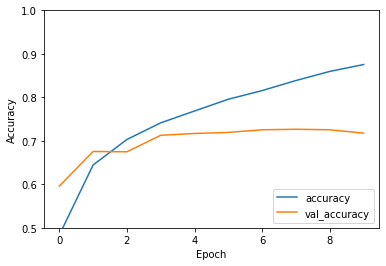

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc)

0.7177000045776367


In [ ]:
train_images.shape 

(50000, 32, 32, 3)

Our simple CNN has achieved a test accuracy of over 70%. Not bad for a few lines of code! For another CNN style, see an example using the Keras subclassing API and a `tf.GradientTape` [here](https://www.tensorflow.org/tutorials/quickstart/advanced).


## Rafa Aqui testando novas coisas


In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 5s - loss: 1.0031 - accuracy: 0.7177

Test accuracy: 0.7177000045776367


In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i][0], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i][0]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [ ]:
predictions[i]

array([4.9246610e-06, 2.5020142e-08, 9.2489255e-04, 9.5526746e-04,
       9.1535211e-01, 8.1634998e-02, 3.3120348e-05, 1.0918552e-03,
       1.3513055e-06, 1.3739278e-06], dtype=float32)

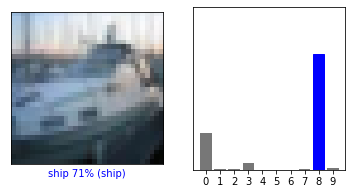

In [ ]:
i = 2
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

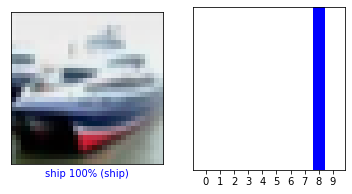

In [ ]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

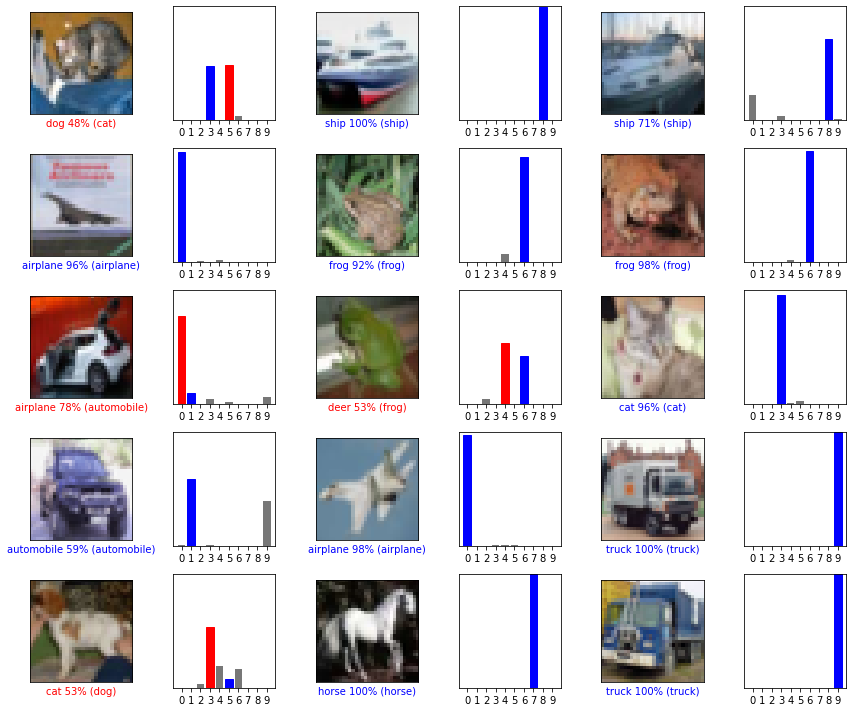

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_labels,predictions.argmax(1) )

array([[784,  10,  51,  22,  23,   6,  10,  16,  49,  29],
       [ 28, 758,   7,   8,  11,   9,  17,   6,  35, 121],
       [ 69,   4, 615,  59,  85,  44,  70,  41,   8,   5],
       [ 18,   2,  79, 500,  87, 170,  84,  43,  10,   7],
       [ 20,   2,  75,  52, 700,  30,  53,  59,   7,   2],
       [ 10,   1,  50, 155,  60, 605,  42,  60,  12,   5],
       [  5,   1,  44,  44,  40,  22, 823,  13,   4,   4],
       [ 13,   3,  43,  42,  69,  47,  10, 767,   1,   5],
       [ 64,  14,  28,  22,   6,   4,  13,   5, 824,  20],
       [ 40,  35,  16,  25,   8,  12,  10,  28,  25, 801]])

In [ ]:
df_confusion = pd.crosstab()

NameError: ignored

In [ ]:
idx = (y_test.argmax(2) == test_pred.argmax(2)).all(axis=1)
idx = np.logical_not(idx)
print '%d de %d CAPTCHAs do set de teste estão erradas' % (idx.sum(), y_test.shape[0])
img_for_plt = X_test[idx, :, :][:9]
label_hat_for_plot = test_pred[idx].argmax(2)[:9]

plot_images(img_for_plt, label_hat_for_plot)